In [17]:
import pandas as pd
import numpy as np
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import rcParams

warnings.filterwarnings("ignore")

In [40]:
path = 'C:/ZhangLI/Codes/DataSet/tabular-playground-series-aug-2021/'
test_dir = path + 'test.csv'
train_dir = path + 'train.csv'
# Colors
dark_red = "#b20710"
black = "#221f1f"
green = "#009473"

In [42]:
train_df = pd.read_csv(train_dir, index_col="id")
test_df = pd.read_csv(test_dir, index_col="id")

In [13]:
# summary of datasets
stat_summary_train = train_df.describe().drop('loss', axis=1).T[['mean', 'std', 'min', '50%', 'max']]
stat_summary_test = test_df.describe().T[["mean", "std", "min", "50%", "max"]]

bins = [-np.inf, 100, 10000, np.inf]
labels = ['Below 100', "Between 100-10000", "Above 10000"]
stat_summary_train['mean_cats_train'] = pd.cut(stat_summary_train["mean"], bins=bins, labels=labels)
stat_summary_train.head()

,mean,std,min,50%,max,mean_cats_train
f0,0.511213,0.307884,-0.069273,0.514962,1.07207,Below 100
f1,51.378476,42.396636,-17.000000,41.000000,273.00000,Below 100
f2,0.107155,1.322200,-7.895580,0.253815,9.76859,Below 100
f3,0.050010,0.792368,-1.475560,0.004099,1.68019,Below 100
f4,3595.133426,6072.401061,-7589.280000,943.000500,37847.50000,Between 100-10000


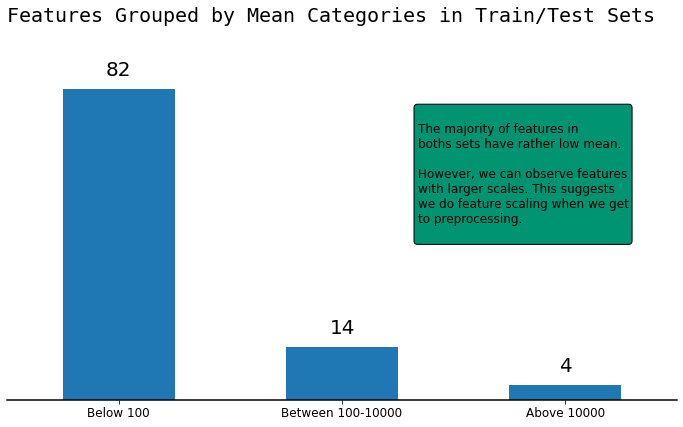

In [33]:
grouped_train = stat_summary_train.value_counts("mean_cats_train").sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the bar
bar = grouped_train.plot(kind="bar", ax=ax)
fig.text(
    0.5,
    1,
    "Features Grouped by Mean Categories in Train/Test Sets",
    fontfamily="monospace",
    size="20",
    ha="center",
)
ax.yaxis.set_visible(False)
ax.set_xlabel("")
for s in ["top", "left", "right"]:
    ax.spines[s].set_visible(False)  # 是否显示边框
    
for patch in ax.patches:
    text = f"{patch.get_height():.0f}"
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() + 5
    ax.text(x, y, text, ha="center", va="center", fontsize=20)
    
plt.setp(ax.get_xmajorticklabels(), rotation=0, fontsize="large")  # 设置x周的
ax.spines["bottom"].set_linewidth(1.5)

fig.text(
    0.6,
    0.5,
    """
The majority of features in 
boths sets have rather low mean.

However, we can observe features
with larger scales. This suggests
we do feature scaling when we get
to preprocessing.
""",
    bbox=dict(boxstyle="round", fc="#009473"),
    fontsize="large",
);

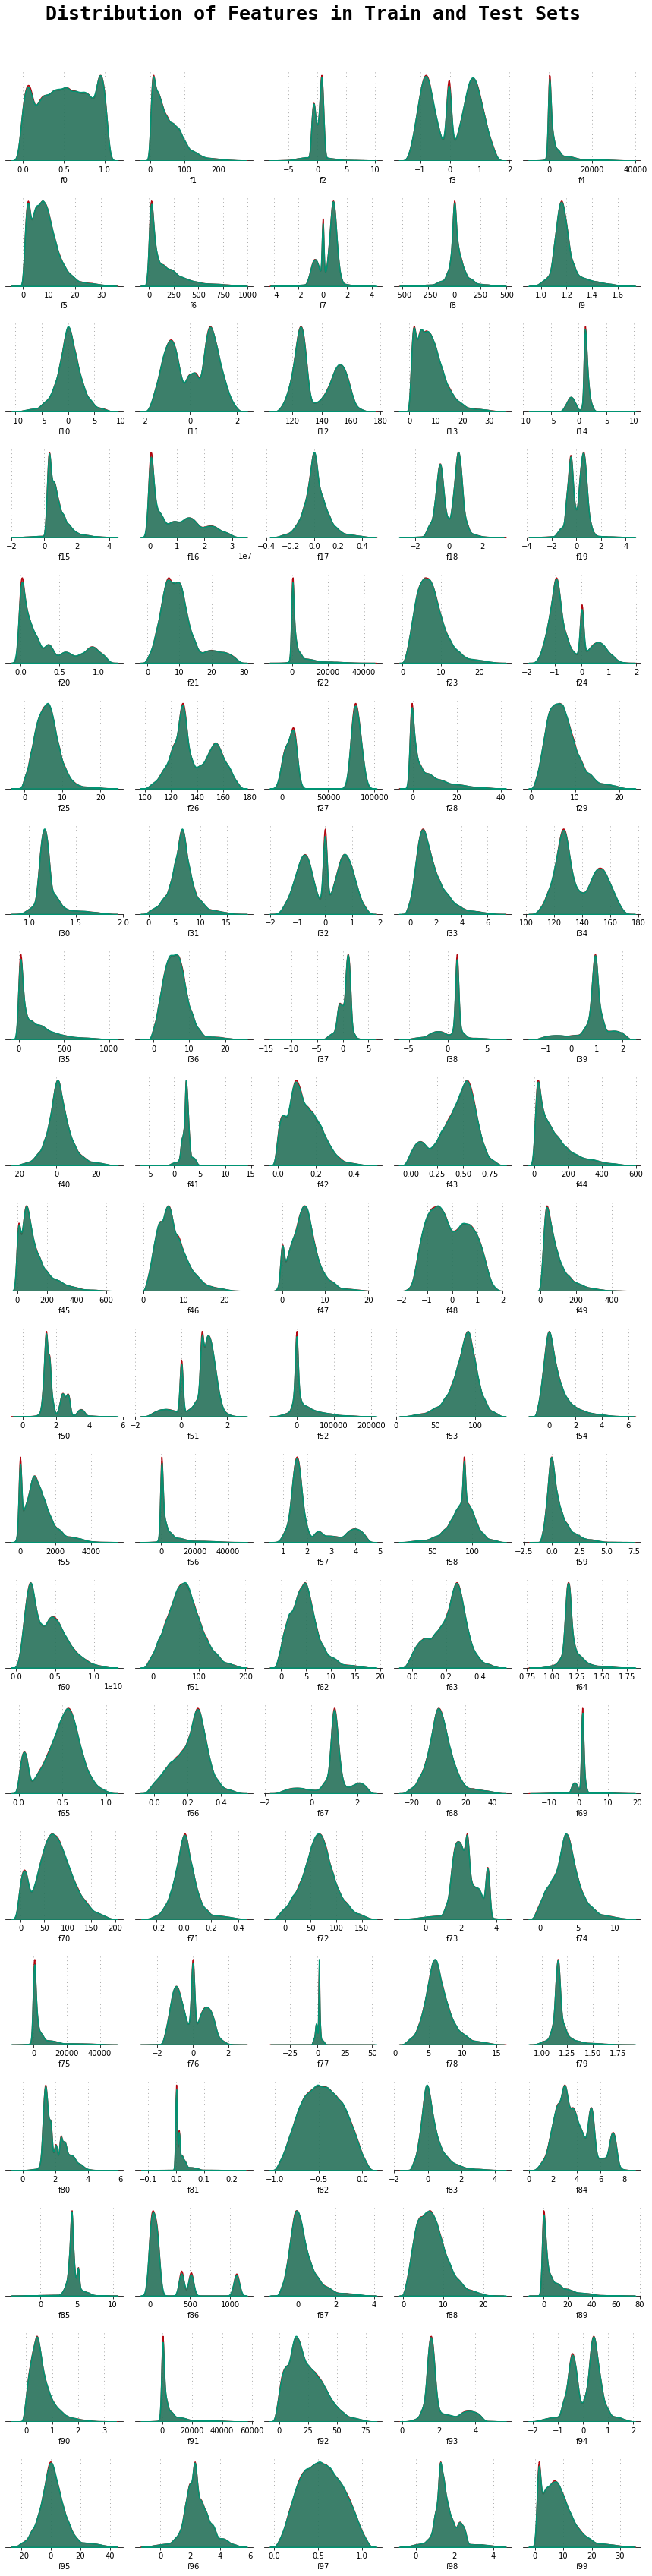

In [44]:
# look at the distribution of both sets as a whole
fig = plt.figure(figsize=(15, 60))
# gs = fig.add_gridspec(20, 5)
# gs.update(wspace=0.1, hspace=0.4)

# Add 100 subplots for all features
temp = 0
for row in range(0, 20):
    for col in range(0, 5):
        locals()[f"ax_{temp}"] = fig.add_subplot(gs[row, col])
        locals()[f"ax_{temp}"].tick_params(axis="y", left=False)
        locals()[f"ax_{temp}"].get_yaxis().set_visible(False)
        locals()[f"ax_{temp}"].set_axisbelow(True)
        for s in ["top", "right", "left"]:
            locals()[f"ax_{temp}"].spines[s].set_visible(False)
        temp += 1

fig.suptitle(
    "Distribution of Features in Train and Test Sets",
    y=0.9,
    fontsize=25,
    fontweight="bold",
    fontfamily="monospace",
)

temp = 0
for feature in test_df.columns.to_list():
    for df, color in zip([train_df, test_df], [dark_red, green]):
        sns.kdeplot(
            df[feature],
            shade=True,
            color=color,
            linewidth=1.5,
            alpha=0.7,
            zorder=3,
            legend=False,
            ax=locals()[f"ax_{temp}"],
        )
    locals()[f"ax_{temp}"].grid(
        which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5)
    )
    locals()[f"ax_{temp}"].set_xlabel(feature)
    temp += 1
plt.show();

In [ ]:
locals()[f"ax_{temp}"]